## 第10章 数据分组/数据透视表
### 10.1 数据分组
#数据分组就是根据一个或多个键（可以是函数、数组或df列名）将数据分成若干个组，然后对分组后的数据进行汇总计算，并将汇总计算后的结果进行合并，被用作汇总计算的函数称为聚合函数。
Excel的分组是通过分类汇总功能来实现的
Python的分组通过groupby()方法，类似于sql的groupby子句。

In [2]:
### 10.1 分组键是列名月销量
#直9月销量接将表,columns=格的某一列或多列的列名传给groupby()方法，groupby方法就会按照这一列或多列进行分组
import pandas as pd
df = pd.DataFrame([[95224,'A类','一线城市','是',6,20,0],
              [55295,'B类','三线城市','否',37,27,35],
              [46035,'A类','二线城市','否',8,1,8],
              [2459,'C类','一线城市','是',7,8,14],
              [22179,'B类','三线城市','否',9,12,4]
             ],
             columns=['用户ID','客户分类','区域','是否省会','7月销量','8月销量','9月销量'])
df

,用户ID,客户分类,区域,是否省会,7月销量,8月销量,9月销量
0,95224,A类,一线城市,是,6,20,0
1,55295,B类,三线城市,否,37,27,35
2,46035,A类,二线城市,否,8,1,8
3,2459,C类,一线城市,是,7,8,14
4,22179,B类,三线城市,否,9,12,4


In [6]:
df.groupby('客户分类').count()

,用户ID,区域,是否省会,7月销量,8月销量,9月销量
客户分类,,,,,,
A类,2,2,2,2,2,2
B类,2,2,2,2,2,2
C类,1,1,1,1,1,1


In [7]:
df.groupby('客户分类').sum()

,用户ID,7月销量,8月销量,9月销量
客户分类,,,,
A类,141259,14,21,8
B类,77474,46,39,39
C类,2459,7,8,14


In [12]:
df.groupby(['客户分类','区域']).count()

用户ID  是否省会  7月销量  8月销量  9月销量
客户分类 区域                                
A类   一线城市     1     1     1     1     1
     二线城市     1     1     1     1     1
B类   三线城市     2     2     2     2     2
C类   一线城市     1     1     1     1     1

In [13]:
df.groupby(['客户分类','区域']).sum()

用户ID  7月销量  8月销量  9月销量
客户分类 区域                           
A类   一线城市  95224     6    20     0
     二线城市  46035     8     1     8
B类   三线城市  77474    46    39    39
C类   一线城市   2459     7     8    14

In [14]:
#无论分组键是一列还是多列，只要在分组后的数据上进行汇总计算，就是对所有可以计算的列进行计算。
#比如我们想看一下ABC类客户分别有多少，我们先按客户分类进行分组，然后把ID这一列取出来进行计数汇总即可
df.groupby('客户分类')['用户ID'].count()

客户分类
A类    2
B类    2
C类    1
Name: 用户ID, dtype: int64

In [3]:
### 10.1.2 分组键是Series
#把DataFrame中的一列取出来就是一个Series
type(df['客户分类'])

pandas.core.series.Series

In [4]:
df.groupby([df['客户分类']]).count()

,用户ID,区域,是否省会,7月销量,8月销量,9月销量
客户分类,,,,,,
A类,2,2,2,2,2,2
B类,2,2,2,2,2,2
C类,1,1,1,1,1,1


In [5]:
df.groupby([df['客户分类'],df['区域']]).count()

用户ID  是否省会  7月销量  8月销量  9月销量
客户分类 区域                                
A类   一线城市     1     1     1     1     1
     二线城市     1     1     1     1     1
B类   三线城市     2     2     2     2     2
C类   一线城市     1     1     1     1     1

In [6]:
df.groupby([df['客户分类'],df['区域']]).sum()

用户ID  7月销量  8月销量  9月销量
客户分类 区域                           
A类   一线城市  95224     6    20     0
     二线城市  46035     8     1     8
B类   三线城市  77474    46    39    39
C类   一线城市   2459     7     8    14

In [14]:
#### 10.1.3 神奇的aggregate方法
#aggregate的神奇之处在于一次可以使用多种汇总方式，对不同的字段使用不同的汇总方式。
df[['用户ID','客户分类','7月销量','8月销量','9月销量']].groupby('客户分类').aggregate(['count','sum'])

用户ID          7月销量      8月销量      9月销量    
     count     sum count sum count sum count sum
客户分类                                            
A类       2  141259     2  14     2  21     2   8
B类       2   77474     2  46     2  39     2  39
C类       1    2459     1   7     1   8     1  14

In [15]:
df[['用户ID','客户分类','7月销量','8月销量']].groupby('客户分类').aggregate({'用户ID':'count','7月销量':'sum','8月销量':'sum'})

,用户ID,7月销量,8月销量
客户分类,,,
A类,2,14,21
B类,2,46,39
C类,1,7,8


In [16]:
type(df[['用户ID','客户分类','7月销量','8月销量']].groupby('客户分类').aggregate({'用户ID':'count','7月销量':'sum','8月销量':'sum'}))

pandas.core.frame.DataFrame

In [17]:
df[['用户ID','客户分类','7月销量','8月销量']].groupby('客户分类').aggregate({'用户ID':'count','7月销量':'sum','8月销量':'sum'}).reset_index()

,客户分类,用户ID,7月销量,8月销量
0,A类,2,14,21
1,B类,2,46,39
2,C类,1,7,8


### 10.2 数据透视表
数据透视表实现的功能与数据分组相类似但又不同，数据分组是在一维(行)方向上不断拆分，而数据透视表是在行、列方向上同时拆分
数据透视表在Excel和Python中都是很重要的功能。
Python中数据透视表的制作原理与Excel中的制作原理是一样的。Python中用pivot_table()方法
pd.pivot_table(data,values=None,index=None,columns=None,aggfunc='mean',fill_value=None,margins=False,dropna=True,margins_name='All')
data：表示要做数据透视表的整个表
values：对应Excel中值那个区域
index：对应Excel中行那个区域
columns：对应Excel中列那个区域
aggfunc：表示对values的计算类型，如果需要对不同的值进行不同的计算类型，则需要传入一个字典。
fill_value：表示对空值的填充值
margins：表示是否显示合计列
dropna：表示是否删除缺失值，如果为真时，则把一整行全作为缺失值删除
margins_name：表示合计列的列名

In [20]:
pd.pivot_table(df,values='用户ID',columns='区域',index='客户分类',aggfunc='count')

区域,一线城市,三线城市,二线城市
客户分类,,,
A类,1.0,NaN,1.0
B类,NaN,2.0,NaN
C类,1.0,NaN,NaN


In [21]:
pd.pivot_table(df,values='用户ID',columns='区域',index='客户分类',aggfunc='count',margins=True)

区域,一线城市,三线城市,二线城市,All
客户分类,,,,
A类,1.0,NaN,1.0,2
B类,NaN,2.0,NaN,2
C类,1.0,NaN,NaN,1
All,2.0,2.0,1.0,5


In [22]:
pd.pivot_table(df,values='用户ID',columns='区域',index='客户分类',aggfunc='count',margins=True,margins_name='总计')

区域,一线城市,三线城市,二线城市,总计
客户分类,,,,
A类,1.0,NaN,1.0,2
B类,NaN,2.0,NaN,2
C类,1.0,NaN,NaN,1
总计,2.0,2.0,1.0,5


In [23]:
pd.pivot_table(df,values='用户ID',columns='区域',index='客户分类',aggfunc='count',margins=True,margins_name='总计',fill_value=0)

区域,一线城市,三线城市,二线城市,总计
客户分类,,,,
A类,1,0,1,2
B类,0,2,0,2
C类,1,0,0,1
总计,2,2,1,5


In [25]:
pd.pivot_table(
    df,
    values=['用户ID','7月销量'],
    columns='区域',
    index='客户分类',
    aggfunc={'用户ID':'count','7月销量':'sum'},
    margins=True,
    margins_name='总计',
    fill_value=0)

7月销量               用户ID             
区域   一线城市 三线城市 二线城市  总计 一线城市 三线城市 二线城市 总计
客户分类                                     
A类      6    0    8  14    1    0    1  2
B类      0   46    0  46    0    2    0  2
C类      7    0    0   7    1    0    0  1
总计     13   46    8  67    2    2    1  5

In [29]:
df

,用户ID,客户分类,区域,是否省会,7月销量,8月销量,9月销量
0,95224,A类,一线城市,是,6,20,0
1,55295,B类,三线城市,否,37,27,35
2,46035,A类,二线城市,否,8,1,8
3,2459,C类,一线城市,是,7,8,14
4,22179,B类,三线城市,否,9,12,4


In [33]:
pd.pivot_table(
    df[['用户ID','客户分类','区域']],
    values=['用户ID'],
    columns='区域',
    index='客户分类',
    aggfunc={'用户ID':'count'},
    margins=True,
    margins_name='总计',
    fill_value=0).reset_index()

客户分类 用户ID             
区域      一线城市 三线城市 二线城市 总计
0    A类    1    0    1  2
1    B类    0    2    0  2
2    C类    1    0    0  1
3    总计    2    2    1  5

## 第11章 多表拼接
### 11.1 表的横向拼接
表的横向拼接就是在横向将两个表依据公共列连接在一起。
在Excel中实现连接是依据vlookup()函数。在Python中利用merge()方法。


In [8]:
df1 = pd.DataFrame([
    [1,'小张',100,650],
    [2,'小王',101,600],
    [3,'小李',102,578],
    [4,'小赵',103,550]],
    columns=[
        '名次','姓名','学号','成绩'])
df2 = pd.DataFrame([
    [100,'一班'],
    [101,'一班'],
    [102,'二班'],
    [103,'三班']],
    columns=['学号','班级']
)

#### 11.1.1 连接表的类型
连接表的类型关注的就是待连接的两个表是什么类型，主要有三种情况：一对一、多对一、多对多。
 ○ 一对一 待连接的两个表的公共列是一对一的，pd.merge()方法可以自动寻找两个表的公共列，并将找到的公共列作为连接列。


In [9]:
df1

,名次,姓名,学号,成绩
0,1,小张,100,650
1,2,小王,101,600
2,3,小李,102,578
3,4,小赵,103,550


In [10]:
df2

,学号,班级
0,100,一班
1,101,一班
2,102,二班
3,103,三班


In [11]:
pd.merge(df1,df2)

,名次,姓名,学号,成绩,班级
0,1,小张,100,650,一班
1,2,小王,101,600,一班
2,3,小李,102,578,二班
3,4,小赵,103,550,三班


In [13]:
# ○ 多对一 待连接的两个表的公共列不是一对一的，其中一个表的公共列有重复值，另一个表的公共列是唯一的。
df1 = pd.DataFrame([
    ['小张',100,650],
    ['小王',101,600],
    ['小李',102,578]],
    columns=[
        '姓名','学号','f_成绩'])
    
df2 = pd.DataFrame([
    [100,568],
    [100,602],
    [101,691],
    [101,702],
    [102,645],
    [102,676]],
    columns=['学号','e_成绩']
)
pd.merge(df1,df2,on='学号')    

,姓名,学号,f_成绩,e_成绩
0,小张,100,650,568
1,小张,100,650,602
2,小王,101,600,691
3,小王,101,600,702
4,小李,102,578,645
5,小李,102,578,676


In [14]:
# 多对多
df1 = pd.DataFrame([
    ['小张',100,650],
    ['小张',100,610],
    ['小王',101,600],
    ['小李',102,578],
    ['小李',102,542]],
    columns=[
        '姓名','学号','f_成绩'])
    
df2 = pd.DataFrame([
    [100,568],
    [100,602],
    [101,691],
    [101,702],
    [102,645],
    [102,676]],
    columns=['学号','e_成绩']
)
pd.merge(df1,df2)    

,姓名,学号,f_成绩,e_成绩
0,小张,100,650,568
1,小张,100,650,602
2,小张,100,610,568
3,小张,100,610,602
4,小王,101,600,691
5,小王,101,600,702
6,小李,102,578,645
7,小李,102,578,676
8,小李,102,542,645
9,小李,102,542,676


In [16]:
#### 11.1.2 连接键的类型
# ○ 默认以公共列作为连接键
# ○ 用on来指定连接键，公共列可以有多列，连接键可以有多个
# ○ 分别指定左右连接键
#   当两个表中没有公共列时，这里指的是实际值一样，但列名不同，否则无法连接。使用参数left_on和right_on来指定连接键的列名。
df1 = pd.DataFrame([
    ['小张',100,650],
    ['小张',100,610],
    ['小王',101,600],
    ['小李',102,578],
    ['小李',102,542]],
    columns=[
        '姓名','编号','f_成绩'])
    
df2 = pd.DataFrame([
    [100,568],
    [100,602],
    [101,691],
    [101,702],
    [102,645],
    [102,676]],
    columns=['学号','e_成绩']
)
pd.merge(df1,df2,left_on='编号',right_on='学号')  

,姓名,编号,f_成绩,学号,e_成绩
0,小张,100,650,100,568
1,小张,100,650,100,602
2,小张,100,610,100,568
3,小张,100,610,100,602
4,小王,101,600,101,691
5,小王,101,600,101,702
6,小李,102,578,102,645
7,小李,102,578,102,676
8,小李,102,542,102,645
9,小李,102,542,102,676


In [27]:
# ○ 把索引当作连接键
#   索引列不算是真正的列，当公共列是索引时，就要把索引列当作连接键，使用的参数分别是left_index和right_index
df1 = pd.DataFrame([
    ['小张',100,650],
    ['小张',100,610],
    ['小王',101,600],
    ['小李',102,578],
    ['小李',102,542]],
    columns=['姓名','编号','f_成绩']).set_index('编号')
df1 

,姓名,f_成绩
编号,,
100,小张,650
100,小张,610
101,小王,600
102,小李,578
102,小李,542


In [30]:
df2 = pd.DataFrame([
    [100,568],
    [100,602],
    [101,691],
    [101,702],
    [102,645],
    [102,676]],
    columns=['学号','e_成绩']    
).set_index('学号')
df2

,e_成绩
学号,
100,568
100,602
101,691
101,702
102,645
102,676


In [31]:
pd.merge(df1,df2,left_index=True,right_index=True) 

,姓名,f_成绩,e_成绩
100,小张,650,568
100,小张,650,602
100,小张,610,568
100,小张,610,602
101,小王,600,691
101,小王,600,702
102,小李,578,645
102,小李,578,676
102,小李,542,645
102,小李,542,676


In [ ]:
#### 11.1.3 连接方式
#前面的两种方式都比较标准，也就是左表中的公共列的值可以在右表对应的公共列中找到，右表的也可以在左表找到。
#若找不到时，就使用how参数来指明具体的连接要求。

In [33]:
df1 = pd.DataFrame([
    [1,'小张',100,650],
    [2,'小王',101,600],
    [3,'小李',102,578],
    [4,'小赵',103,550]],
    columns=[
        '名次','姓名','学号','成绩'])
df2 = pd.DataFrame([
    ['小张',100,'一班'],
    ['小王',101,'一班'],
    ['小李',102,'二班'],
    ['小钱',104,'三班']],
    columns=['姓名','学号','班级']
)
df1

,名次,姓名,学号,成绩
0,1,小张,100,650
1,2,小王,101,600
2,3,小李,102,578
3,4,小赵,103,550


In [34]:
# ○ 内连接(inner)
#内连接就是取两个表的公共部分,如果不指明，默认都是内连接。
df2

,姓名,学号,班级
0,小张,100,一班
1,小王,101,一班
2,小李,102,二班
3,小钱,104,三班


In [35]:
pd.merge(df1,df2,on='学号',how='inner')

,名次,姓名_x,学号,成绩,姓名_y,班级
0,1,小张,100,650,小张,一班
1,2,小王,101,600,小王,一班
2,3,小李,102,578,小李,二班


In [36]:
# ○ 左连接
#左连接就是以左表为基础，右表往左表上拼接，没有对应信息的话，则拼接的信息就是NaN。
pd.merge(df1,df2,on='学号',how='left')

,名次,姓名_x,学号,成绩,姓名_y,班级
0,1,小张,100,650,小张,一班
1,2,小王,101,600,小王,一班
2,3,小李,102,578,小李,二班
3,4,小赵,103,550,NaN,NaN


In [37]:
# ○ 右连接
#右连接就是以右表为基础，左表往右表上拼接，没有对应信息的话，同样拼接NaN。
pd.merge(df1,df2,on='学号',how='right')

,名次,姓名_x,学号,成绩,姓名_y,班级
0,1.0,小张,100,650.0,小张,一班
1,2.0,小王,101,600.0,小王,一班
2,3.0,小李,102,578.0,小李,二班
3,NaN,NaN,104,NaN,小钱,三班


In [38]:
# ○ 外连接
#外连接就是取两个表的并集，没有对应信息的话，同样拼接NaN。
pd.merge(df1,df2,on='学号',how='outer')

,名次,姓名_x,学号,成绩,姓名_y,班级
0,1.0,小张,100,650.0,小张,一班
1,2.0,小王,101,600.0,小王,一班
2,3.0,小李,102,578.0,小李,二班
3,4.0,小赵,103,550.0,NaN,NaN
4,NaN,NaN,104,NaN,小钱,三班


In [39]:
#### 11.1.4 重复列名处理
#两个表进行连接时，经常会遇到列名重复的情况，pd.merge会自动给列名添加_x、_Y、_z后缀。
#自定义重复列名，只需要修改参数suffixes的值即可，默认为["_x","_y"]
pd.merge(df1,df2,on='学号',how='inner',suffixes=['_L','_R'])

,名次,姓名_L,学号,成绩,姓名_R,班级
0,1,小张,100,650,小张,一班
1,2,小王,101,600,小王,一班
2,3,小李,102,578,小李,二班


In [54]:
### 11.2 表的纵向连接
#横向连接是两个表依据公共列在水平方向上进行拼接，而纵向拼接是在垂直方向进行拼接
#一般的应用场景就是将分离的若干个结构相同的数据表合并成一个数据表。
df1 = pd.DataFrame([
    ['许丹','一班'],
    ['李旭文','一班'],
    ['程承','一班'],
    ['赵涛','一班'],
    ['葛燕','二班']],
    columns=['姓名','班级'],
    index=[1,2,3,4,5]
)
df2 = pd.DataFrame([
    ['赵义','二班'],
    ['李彭','二班'],
    ['未来','二班'],
    ['葛燕','二班']],
    columns=['姓名','班级'],
    index=[1,2,3,4]
)
df1

,姓名,班级
1,许丹,一班
2,李旭文,一班
3,程承,一班
4,赵涛,一班
5,葛燕,二班


In [50]:
df2

,姓名,班级
1,赵义,二班
2,李彭,二班
3,未来,二班
4,葛燕,二班


In [55]:
#### 11.2.1 普通合并 pd.concat()
pd.concat([df1,df2],sort=True)

,姓名,班级
1,许丹,一班
2,李旭文,一班
3,程承,一班
4,赵涛,一班
5,葛燕,二班
1,赵义,二班
2,李彭,二班
3,未来,二班
4,葛燕,二班


In [56]:
#### 11.2.2 索引设置
#pd.concat方法默认保留原表索引，这样看起来有些不习惯，通过设置ignore_index=True则会生成新的索引，放弃原表的索引。
pd.concat([df1,df2],sort=False,ignore_index=True)

,姓名,班级
0,许丹,一班
1,李旭文,一班
2,程承,一班
3,赵涛,一班
4,葛燕,二班
5,赵义,二班
6,李彭,二班
7,未来,二班
8,葛燕,二班


In [57]:
#### 11.2.3 重叠数据合并
#调用方法drop_duplicates()
pd.concat([df1,df2],sort=False,ignore_index=True).drop_duplicates()

,姓名,班级
0,许丹,一班
1,李旭文,一班
2,程承,一班
3,赵涛,一班
4,葛燕,二班
5,赵义,二班
6,李彭,二班
7,未来,二班


In [1]:
## 第12章 结果导出
### 12.1 导出为.xlsx文件
#Excel可以导出为PDF/XPS两种格式，另存为很多格式。
#Python中导出为.xlsx格式，用到的是df.to_excel()方法。
#### 12.1.1 设置文件路径 excel_writer=r"path\path1\xyz.xlsx"
#### 12.1.2 设置sheet名 sheet_name=‘sheetname’
#### 12.1.3 设置索引 默认索引是从0开始的整数，index=False可以去掉这种没啥意义的索引，不显示出来
#### 12.1.4 设置要导出的列 columns=[‘列1’，‘列2’]
#### 12.1.5 设置编码格式 encoding='utf-8'
#### 12.1.6 缺失值处理 na_rep=0 #缺失填充0
#### 12.1.7 无穷值处理 inf_rep=0 #无穷值(除数是0产生的结果)用0替换
import pandas as pd
df = pd.DataFrame([[95224,'A类','一线城市','是',6,20,0],
              [55295,'B类','三线城市','否',37,27,35],
              [46035,'A类','二线城市','否',8,1,8],
              [2459,'C类','一线城市','是',7,8,14],
              [22179,'B类','三线城市','否',9,12,4]
             ],
             columns=['用户ID','客户分类','区域','是否省会','7月销量','8月销量','9月销量'])
df

#df.to_excel(ew)
#df.to_excel(excel_writer=r'e:\import.xlsx')

,用户ID,客户分类,区域,是否省会,7月销量,8月销量,9月销量
0,95224,A类,一线城市,是,6,20,0
1,55295,B类,三线城市,否,37,27,35
2,46035,A类,二线城市,否,8,1,8
3,2459,C类,一线城市,是,7,8,14
4,22179,B类,三线城市,否,9,12,4


In [15]:
ew = pd.ExcelWriter(
    'output.xlsx',
    sheet_name='test',
    index=False,
    columns=['用户ID','客户分类']
    )
df.to_excel(ew,sheet_name="aaa")
df.to_excel(ew,sheet_name="bbb")
ew.save()

In [13]:
### 12.2 导出为csv文件
pb = 'out.csv'
df.to_csv(pb)

In [ ]:
## 第13章 数据可视化
### 13.1 什么是数据可视化
#借助图形来清晰有效表达信息的方式称为可视化，可以更好地传递信息。

In [ ]:
### 13.2 数据可视化的基本流程
#### 13.2.1 整理数据
#### 13.2.2 明确目的
#### 13.2.3 寻找合适的表现形式

In [ ]:
### 13.3 图表的基本组成元素
#### 13.3.1 画布 画图的地方
#### 13.3.2 坐标系 分为直角坐标系、球坐标系、和极坐标系，其中直角坐标系最常用。
#### 13.3.3 坐标轴
#### 13.3.4 坐标轴标题
#### 13.3.5 图表标题
#### 13.3.6 数据标签
#### 13.3.7 数据表
#### 13.3.8 网格线 坐标轴的延伸
#### 13.3.9 图例
#### 13.3.10 误差线

In [ ]:
### 13.4 Excel与Python可视化
#Excel就是插入图表

In [30]:
### 13.5 建立画布和坐标系
#### 13.5.1 建立画布
import matplotlib.pyplot as plt
#让图表直接在JupyterNotebook中展示出来
%matplotlib inline
#设置图表为矢量格式
%config InlineBackend.figure_format = 'svg'
#解决中文乱码问题
plt.rcParams['font.sans-serif']='SimHei'
#解决负号无法正常显示问题
plt.rcParams['axes.unicode_minus'] = False

#建立画布
fig = plt.figure(figsize = (18,16))

<Figure size 1296x1152 with 0 Axes>

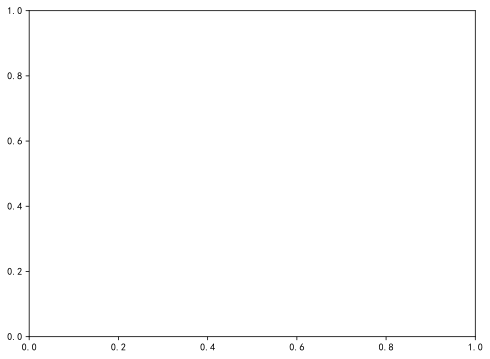

In [33]:
#### 13.5.2 用add_subplot函数建立坐标系
#建立画布
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(1,1,1)

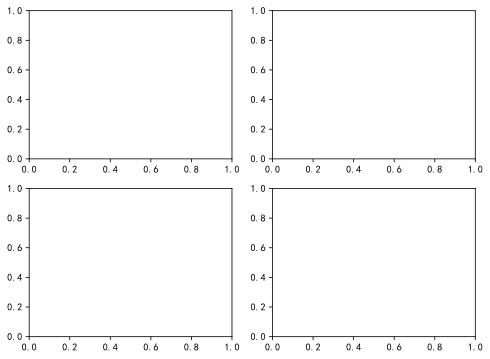

In [34]:
#建立多个坐标系
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

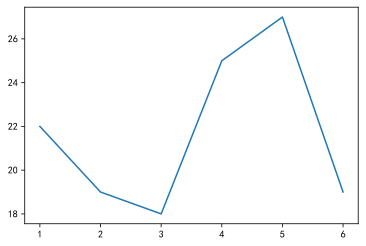

In [29]:
#测试画图
plt.plot([1,2,3,4,5,6], [22,19,18,25,27,19])
plt.show()

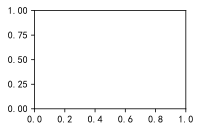

In [35]:
#### 13.5.3 用plt.subplot2grid函数建立坐标系
#用plt.subplot2grid函数建立坐标系时不需要先建立画布，只需要导入plt库即可
plt.subplot2grid((2,2),(0,0))

<BarContainer object of 6 artists>

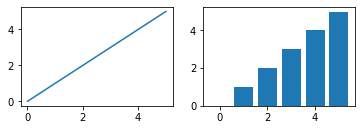

In [3]:
import numpy as np
x = np.arange(6)
y = np.arange(6)
plt.subplot2grid((2,2),(0,0))
plt.plot(x,y)
plt.subplot2grid((2,2),(0,1))
plt.bar(x,y)

In [ ]:
#### 13.5.4 用plt.subplot函数建立坐标系
#与plt.subplot2grid函数类似，plt.subplot也是plt库的一个函数，也表示将区域分成几份，并指明在哪个区域上绘图，区别是表现形式不一样。
#用这种方式建立坐标系时同样需要将具体的绘图代码跟在建立坐标系语句的后面。

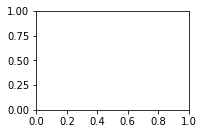

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
x = np.arange(6)
y = np.arange(6)
plt.subplot(2,2,1)
plt.plot(x,y)
plt.subplot(2,2,4)
plt.bar(x,y)

#### 13.5.5 用plt.subplots函数建立坐标系
#plt.subplots函数也是plt的一个函数，它与plt.subplot2grid和plt.subplot函数的区别是，subplot2grid和subplot函数每次只返回一个坐标系，而subplots函数每次可以返回多个坐标系,绘图没有成功，以后再研究

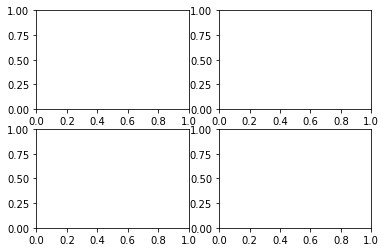

In [13]:
axes = plt.subplots(2,2)

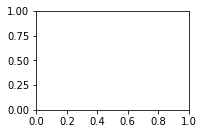

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
x = np.arange(6)
y = np.arange(6)
plt.subplot(2,2,1)

TypeError: tuple indices must be integers or slices, not tuple

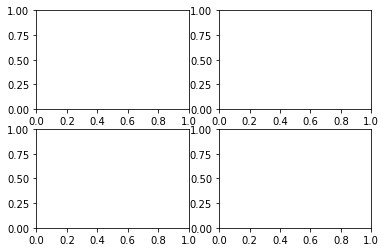

In [17]:
#你想在哪个坐标系里面绘图通过axes[x,y]指明即可。
import numpy as np
import matplotlib.pyplot as plt 
x = np.arange(6)
y = np.arange(6)
axes = plt.subplots(2,2)
axes[0,0].bar[x,y]

#### 13.5.6 几种创建坐标系方法的区别
第一种创建坐标系的方法add_subplot属于对象式编程，所有的操作都是针对某个对象进行的，比如先建立一块儿画布，然后在这块画布上建立坐标系，进而在坐标系上绘图。而后三种方式属于函数式编程，都是直接调用plt库里面的某个函数或方法达到创建坐标系的目的。对象式编程的代码比较繁琐，有过程，相对便于理解；函数式编程代码简洁，不利于掌握绘图原理，没有过程。

### 13.6  设置坐标轴
#### 13.6.1 设置坐标轴的标题
xlabel（ylabel）可以设置标题内容， 
plt.rcParams['font.sans-serif']='SimHei' 标题为中文时需要设置#解决中文乱码问题
labelpad 还可以设置标题距离x轴和y轴的距离
fontsize='xx-large' 字体大小 (最大)
color='#70ad47' 没有效果
fontweight=‘bold’  没有效果
#### 13.6.2 设置坐标轴的刻度
坐标轴刻度设置的第一点就是x轴、y轴每个刻度处显示什么，默认都是显示x/y的值，可以自定义显示不同刻度处的值，使用的方法是plt库中的xticks、yticks函数,语法是：plt.xticks(ticks,labels)
除了xticks、yticks方法，还可以使用plt库中tick_params函数对轴刻度进行设置。tick_params参数说明如下：
 ○ axis：对哪个轴的刻度线进行设置，x、y、both三个选项
 ○ reset：是否重置所有设置，True/False
 ○ which：对哪种刻度线进行设置，major(主刻度线)、minor(次刻度线)、both三个可选
 ○ direction：刻度线的朝向，in(朝里)、out(朝外)、inout(里外均有)三个可选
 ○ length：刻度线长度
 ○ width：刻度线宽度
 ○ color：刻度线颜色
 ○ pad：刻度线与刻度标签间的距离
 ○ labelsize：刻度标签大小
 ○ labelcolor：刻度标签颜色
 ○ top、bottom、left、right：True/False可选，控制上、下、左、右刻度是否显示
 ○ labeltop、labelbottom、labelleft、lebelright：True/False可选，控制上、下、左、右刻度标签是否显示
 #### 13.6.3 设置坐标轴的范围
 plt.xlim(a,b) plt.ylim(c,d)坐标轴刻度范围就是设置坐标轴的最大值和最小值
 #### 13.6.4 坐标轴的轴显示设置
 有的时候为了美观，会把一些不需要显示的轴关闭，这个时候就可以通过坐标轴的轴显示设置达到目的，坐标轴的轴默认都是显示的。
 ### 其他图表格式的设置
 #### 13.7.1 网格线设置
 网格线是相比于坐标轴更小的单位，网格线默认是关闭的，可以通过修改参数b=‘True’来启用网格线
 可以通过修改参数axis的值来控制打开哪个轴的网格线
 网格线可以设置线宽、线型、线的颜色等,实测线的样式设置无效。
 #### 13.7.2 设置图例
 图例对图表起注释作用，在绘图的时候通过给label参数传入值表示该图表的图例名，再通过plt.legend()方法将图例显示出来。
 还可以修改loc参数的参数值来调整图例的显示位置，loc参数的说明如下：
 代码 字符串  说明
  0  best  根据图表区域自动选择最合适的展示位置
  1  upper right  右上角
  2  upper left  左上角
  3  lower left  左下角  
  4  lower right  右下角
  5  right  右侧
  6  center left  左侧中心
  7  center right  右侧中心
  8  lower center  底部中心
  9  upper center  顶部中心
  10 center  正中心
  在具体设置图例位置时，既可以给参数loc传入字符串，也可以给参数传入位置代码
  多个图例默认显示在一列，可以通过ncol=n来设置图例的显示列数
  图例外观设置
  fontsize：图例字号大小
  prop：关于文本的相关设置，以字典形式传给参数prop
  facecolor：图例框的背景颜色
  edgecolor：图例框的边框颜色
  title：图例标题
  title_fontsize：图例标题的大小
  shadow：是否个图例框添加阴影，默认为False
#### 13.7.3 图表标题设置
图表标题是用来说明整个图表的核心思想的。plt.title(label='图表标题')
可以通过修改loc参数来修改标题的显示位置，loc有三个参数可选center、left、right
还可以通过fontdict参数对标题文字的相关性进行设置
#### 13.7.4 设置数据标签
数据标签其实就是根据坐标值在对应位置显示相应数值，可以利用text函数实现，语法如下：
plt.text(x,y,str,ha,va,fontsize),其中，
x,y：表示要在哪里显示数值
str：表示要显示的具体数值
horizontalalignment：简称ha，表示str在水平方向的位置，有center、left、right三个值可选。
verticalalignment: 简称va，表示str在垂直方向的位置，有center、top、bottom三个值可选
fontsize：设置石头人字体大小
plt.text()函数只针对坐标轴中的具体某一点(x,y)显示数值str，要想对整个图表显示数据标签，需要利用for进行遍历.
#### 13.7.5 图表注释
图表注释与数据标签作用类似，都是便于看图者更快地获取图表信息，实现方法如下：
plt.annotate(s,xy,xytext,arrowprops)，其中，
s：表示要注释的文本内容
xy：表示要注释的位置
xytext：表示要注释的文本的显示位置
arrowprops:设置箭头相关参数，颜色、箭类型
facecolor表示箭的颜色，arrowstyle表示箭的类型，主要有以下几种：
'-'  '->'  '-'  '-' '<-'  '<->'  '<'  'fancy'  'simple'  'wedge'
#### 13.7.6 数据表
数据表就是在图表基础上再添加一个表格，使用的是plt库中的table函数
table(
    cellText=None,   #数据表内的值
    cellColours=None,  #数据表的颜色
    cellLoc='right',  #数据表中数值的位置
    colWidths=None,  #列宽
    rowLabels=None,  #行标签
    rowColours=None,  #行标签的颜色
    rowLoc='left',  #行标签的位置
    colLabels=None,  #列标签 
    colColours=None,  #列标签的颜色
    colLoc='center'  #列标签的位置
    loc='bottom'  #整个数据表的位置，可选坐标系的上、下、左、右
)
测试显示plt库没有table方法

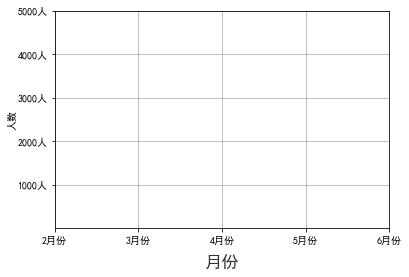

In [56]:
import numpy as np
import matplotlib.pyplot as plt 
x = np.arange(6)
y = np.arange(6)
plt.subplot(1,1,1)
#解决中文乱码问题
plt.rcParams['font.sans-serif']='SimHei'
#设置坐标轴标题，文本内容和文本样式
plt.xlabel("月份",labelpad=10,fontsize='xx-large',color='#333333',fontweight='bold')
plt.ylabel("人数",labelpad=1)
#设置坐标轴刻度
plt.xticks(np.arange(9),['1月份','2月份','3月份','4月份','5月份','6月份','7月份','8月份','9月份'])
plt.yticks(np.arange(1000,7000,1000),['1000人','2000人','3000人','4000人','5000人','6000人'])
#设置坐标轴范围,会覆盖原来的设置
plt.xlim(1,5)
plt.ylim(0,5000)
#设置网格线，线的样式设置无效
plt.grid(b='True',axis='both')

Text(7, 1605, '服务器宕机了')

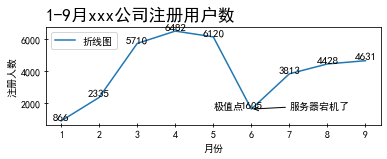

In [76]:
import numpy as np
import matplotlib.pyplot as plt 

#绘图的数据
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])

#解决中文乱码问题
plt.rcParams['font.sans-serif']='SimHei'

#在2X1的坐标系中绘图
plt.subplot(2,1,1)

#plot是绘制折线图
plt.plot(x,y,label='折线图')

#设置坐标轴的标题
plt.xlabel("月份")
plt.ylabel("注册人数")

#轴刻度线设置成双向且下轴刻度标签不显示
plt.tick_params(
    axis='both',
    which='both',
    direction='inout'#,
    #labelbottom=False
)
#plt.axis('off')
#设置图例 #设置图例位置
plt.legend(loc=2)
#设置图表标题
plt.title(label='1-9月xxx公司注册用户数',loc='left',fontsize='xx-large')
#设置数据标签
plt.text(5,1605,'极值点')
#for循环对整个图表显示数据标签
for a,b in zip(x,y):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=11)
    
#设置注释
plt.annotate("服务器宕机了",
            xy=(6,1605),
            xytext=(7,1605),
            arrowprops=dict(facecolor='red',arrowstyle='->'))

In [77]:
cellText = [[8566,5335,7310,6482],[4283,2667,3655,3241]]
rows = ['任务量','完成量']
columns = ['东区','南区','西区','北区']
plt.talbe(
    cellText = cellText,
    cellLoc = 'center',
    rowLabels = rows,
    rowColours = ['red','yellow'],
    rowLoc = 'center',
    colLabels = columns,
    colColours = ['red','yellow','red','yellow'],
    colLoc = 'left',
    loc = 'bottom')

AttributeError: module 'matplotlib.pyplot' has no attribute 'talbe'

### 13.8 

#### 13.8.1 绘制折线图
折线图常用于表示随着时间的推移某指标的变化趋势，使用的是plt库中的plot方法，只有xy是必选项，具体参数如下：
plt.plot(
    x,y,  #x轴和y轴数据
    color,  #折线图的颜色，可以用颜色、颜色的首字母表示、16进制及RGB元组表示
    linestyle,  #线型 solid(实线) dashed(虚线) dashdot(点划线) dotted(点线)
    linewidth,  #线宽 浮点数表示线宽
    marker,  #表示折线图中每点的标记物的形状：.点 'O圆圈 v下三角 ^上三角 <左三角 >右三角 s正方形 p五边形 *五角星 h六边形 +加号
             # x标记 D大菱形 d小菱形 _横线
    markeredgecolor,  #标记外边颜色
    markeredgewidth,  #标记外边线宽
    makerfacecolor,  #标记实心颜色
    makersize,  #标记大小
    label)  #该图的图例名称
    
 #### 13.8.2 绘制柱形图
 柱形图用于比较不同类别之间的数据情况。
 簇状柱形图表示不同类别随同一变量的变化情况，绘制时需要调整柱子的位置。
 堆积柱形图用来比较同类别各变量和不同类别变量的总和差异，在相同的x位绘制不同的y，y就会自动叠加。
 使用的是plt库的bar方法
 plt.bar(
     x,  #显示柱形图的位置
     heigth,  #每根柱子的高度
     width=0.8,  #每根柱子的宽度，每根柱子的宽度可以都一样，也可以各不相同
     bottom=None,  #每根柱子的底部位置，每根柱子的底部可以一样，也可以各不相同
     align='center',  #柱子的位置与x值关系，有center、edge两个参数可选，center表示柱子位于x值的中心位置，edge表示柱子位于x值的边缘位置
     color,  #柱子颜色
     edgecolor  #柱子边缘颜色
 )
 
 #### 13.8.3 绘制条形图
 条形图与柱形图类似，只不过是将柱形图的x轴和y轴进行了调换，纵向柱形图变成了横向柱形图，使用的是plt库的barh方法
 plt.barh(
     y,  #柱子的纵坐标
     width,  #柱子在横向的宽度，即横坐标
     height,  #柱子的纵向高度，即柱子的实际宽度
     align,  #柱子的对齐方式
     color,  #柱子的颜色
     edgecolor  #柱子的边缘颜色
 )
 
 #### 13.8.4 绘制散点图
 散点图常被用来发现各变量之间的相关关系，使用的是plt库中的scatter方法
 plt.scatter(
     x,y,  #散点的位置
     s,  #每个点的面积，即散点的大小。如果只有一个具体值时，则所有点的大小都一样。多值且大小不一样时就是气泡图
     c,  #每个点的颜色，如果只有一种颜色时，则所有点的颜色都相同，也可以呈现多个颜色值，让不同点的颜色不同
     marker,  #每个点的标记，和折线图中的marker一致
     linewidth,  #每个散点的线宽
     edgecolors  #每个散点的外轮廓的颜色
 )
 
 #### 13.8.5 绘制面积图
 面积图与折线图类似，使用stackplot方法
 plt.stackplot(
     x,y,  #数据
     labels,  #图例名
     colors  #图表颜色
 )
 
 #### 13.8.6 绘制树地图
 树地图常用来表示同一等级中不同类别的占比关系，使用的是squarify库，需要pip安装该库
 squarify.plot(
     sizes,  #待绘图数据
     label,  #不同类别的图例标签
     color,  #不同类别的颜色
     value,  #不同类别的数据标签
     edgecolor,  #不同类别之间的边框颜色
     linewidth  #边框线宽
 )
 
 #### 13.8.7 绘制雷达图
 雷达图常用来评价某一事屋，它可以直观地看成该事物的优势与不足，使用plt库中的polar方法。
 polar方法是用来建立极坐标的，其实雷达图就是先将各点展示在极坐标中，然后用线将各点连接起来。
 plt.polar(
     theta,  #没一点在极坐标系中的角度
     r,  #没一点在极坐标系中的半径
     color,  #连接各点之间线的颜色
     marker, #每点的标记物
     linewidth  #连接线的宽度
 )
 
 #### 13.8.9 绘制箱型图
 箱型图用来反映一组数据离散情况，使用plt库中的boxplot方法
 plt.boxplot(
     x,  #待绘图源数据
     vert,  #箱型图没有定义，如果为True则表示正向，默认为True
     widths,  #箱型图的宽度
     labels   #箱型图的标签
 )
 
 #### 13.8.10 绘制饼图
 饼图也常用来表示同一等级中不同类别的占比情况，使用的方法是plt库中的pie方法
 plt.pie(
     x,  #待绘图数据
     explode,  #饼图中每一块离圆心的距离
     labels,  #每一块的标签
     colors,  #每一块的颜色
     autopct,  #饼图内数值的百分比格式
     pctdistance,  #数据标签距的距离
     shadow,  #是否有阴影
     labeldistance,  #每一块索引距中心的距离
     startangle,  #饼图的初始角度
     radius,  #饼图的半径
     counterclock,  #是否让饼图逆时针显示
     wedgeprops,  #饼图内边界属性
     textprops,  #饼图中文本相关属性
     center,  #饼图中心位置
     frame  #是否显示饼图背后的图框
 )
 
 #### 13.8.11 绘制环形图
 环形图与饼图类似，常用来表示同一层级不同类别之间的占比关系，使用的也是pie方法
 
 #### 13.8.12 绘制热力图
 热力图是将某一事物的响应度反映在图表上，可以快速发现需重点关注的区域，使用的是plt库的imshow方法
 plt.imshow(
     x,  #待绘图的数据，需要矩阵形式
     xmap  #配色方案，用来表面图表渐变的主题色，可选值封装在plt.cm里，在Jupyter中输入后按tab键可查看。
 )
 
 #### 13.8.13 绘制水平线垂直线
 水平线和垂直线主要用来做对比参考，使用plt库的axhline和axvline方法
 plt.axhline(y,xmin,xmax)
 plt.axvline(x,ymin,ymax)其中
     x，y：画线的横、纵坐标
     xmin,xmax：水平线的起点和终点
     ymin，ymax：垂直线的起点和终点

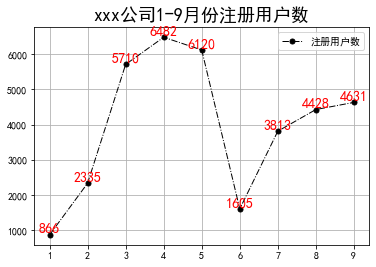

In [2]:
###绘制折线图实例
import numpy as np
import matplotlib.pyplot as plt 

import numpy as np
import matplotlib.pyplot as plt 

#绘图的数据
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])

#解决中文乱码问题
plt.rcParams['font.sans-serif']='SimHei'

#1)建立一个坐标系
plt.subplot(1,1,1)

#2）指明x和y值
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])

#3）绘图
plt.plot(
    x,y,
    color='k',
    linestyle='dashdot',
    linewidth=1,
    marker='o',
    markersize=5,
    label='注册用户数'
)

#4）设置标题(标题名及标题位置)
plt.title('xxx公司1-9月份注册用户数',loc='center',fontsize=18)

#5）添加数据标签
for a,b in zip(x,y):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=14,color='red')
    
#6）设置网格线
plt.grid(True)

#7）设置图例
plt.legend()

#8）保存图到本地
plt.savefig('testplot.jpg')

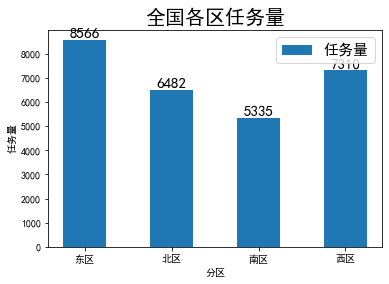

In [9]:
###绘制普通柱形图
#建立一个坐标系
plt.subplot(1,1,1)

#指明x和y值
x = np.array(['东区','北区','南区','西区'])
y = np.array([8566,6482,5335,7310])

#绘图
plt.bar(x,y,width=0.5,align='center',label='任务量')

#设置标题
plt.title('全国各区任务量',loc='center',fontsize=20)

#添加数据标签
for a,b in zip(x,y):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=15)
    
#设置x轴和y轴的名称
plt.xlabel('分区')
plt.ylabel('任务量')

#显示图例
plt.legend(fontsize=15)

#保存图表到本地
plt.savefig('bar.jpg')

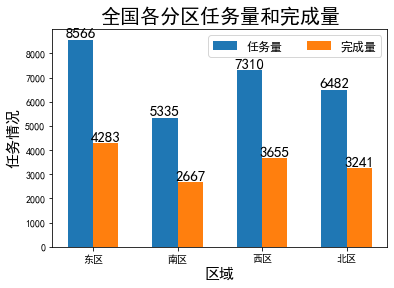

In [10]:
###绘制簇状柱形图
#1 建立坐标系
plt.subplot(1,1,1)

#2 指明x和y值
x = np.array([1,2,3,4])
y1 = np.array([8566,5335,7310,6482])
y2 = np.array([4283,2667,3655,3241])

#3 绘图
plt.bar(x,y1,width=0.3,label='任务量')
plt.bar(x+0.3,y2,width=0.3,label='完成量')

#4 设置标题
plt.title('全国各分区任务量和完成量',loc='center',fontsize=20)

#5 添加数据标签
for a,b in zip(x,y1):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=15)
for a,b in zip(x+0.3,y2):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=15)
    
#5 设置x轴和y轴的名称
plt.xlabel('区域',fontsize=15)
plt.ylabel('任务情况',fontsize=15)

#6 设置x轴刻度
plt.xticks(x+0.15,['东区','南区','西区','北区'])

#7 设置网格线
plt.grid(False)

#8 设置图例
plt.legend(fontsize=12,ncol=2)

#9 保存图片到本地
plt.savefig('bar2.jpg')

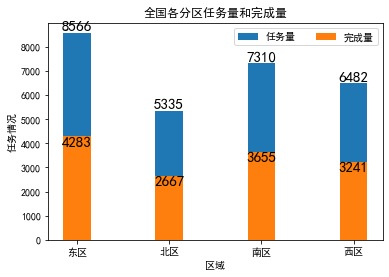

In [16]:
###绘制堆积柱形图
import matplotlib.pyplot as plt
import numpy as np

#0 解决中文乱码问题
plt.rcParams['font.sans-serif']='SimHei'

#1 建立坐标系
plt.subplot(1,1,1)

#2 设置x和y值
x = np.array(['东区','北区','南区','西区'])
y1 = np.array([8566,5335,7310,6482])
y2 = np.array([4283,2667,3655,3241])

#3 绘图，柱子的宽度为0.3
plt.bar(x,y1,width=0.3,label='任务量')
plt.bar(x,y2,width=0.3,label='完成量')

#4 设置标题
plt.title('全国各分区任务量和完成量',loc='center')

#5 添加数据标签
for a,b in zip(x,y1):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=15)
for a,b in zip(x,y2):
    plt.text(a,b,b,ha='center',va='top',fontsize=15)
    
#6 设置x轴和y轴名称
plt.xlabel('区域')
plt.ylabel('任务情况')

#7 设置网格线
plt.grid(False)

#8 设置图例
plt.legend(loc='upper right',ncol=2)

#9 保存文件到本地
plt.savefig('堆积图实例.jpg')

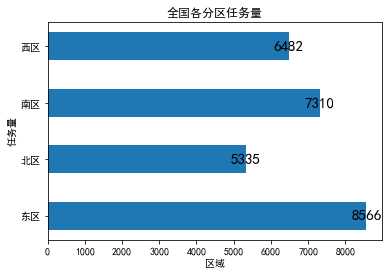

In [19]:
###绘制条形图
#1 建立坐标系
plt.subplot(1,1,1)

#2 设置x和y的值
x = np.array(['东区','北区','南区','西区'])
y = np.array([8566,5335,7310,6482])

#3 绘图
plt.barh(x,height=0.5,width=y,align='center')

#4 设置标题
plt.title('全国各分区任务量',loc='center')

#5 添加数据标签
for a,b in zip(x,y):
    plt.text(b,a,b,ha='center',va='center',fontsize=15)
    
#6 设置轴标签
plt.xlabel('区域')
plt.ylabel('任务量')

#7 文件保存到本地
plt.savefig('条形图.jpg')

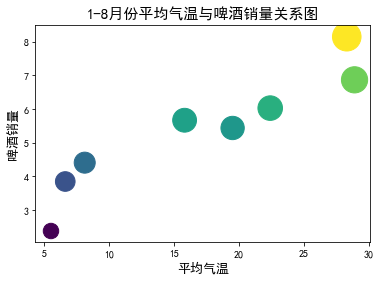

In [24]:
###绘制散点图
plt.subplot(1,1,1)
x = np.array([5.5,6.6,8.1,15.8,19.5,22.4,28.3,28.9])
y = np.array([2.38,3.85,4.41,5.67,5.44,6.03,8.15,6.87])
colors = y*10
area = y*100
plt.scatter(x,y,c=colors,marker='o',s=area)
plt.title('1-8月份平均气温与啤酒销量关系图',loc='center',fontsize=15)
plt.xlabel('平均气温',fontsize=13)
plt.ylabel('啤酒销量',fontsize=13)
plt.savefig('散点图实例.jpg')

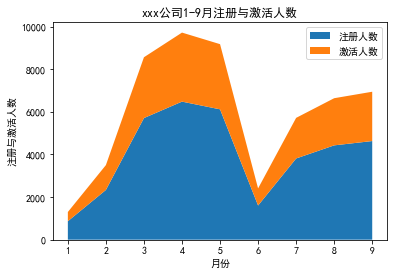

In [26]:
###绘制面积图
plt.subplot(1,1,1)
x = np.array([1,2,3,4,5,6,7,8,9])
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([433,1167,2855,3241,3060,802,1906,2214,2315])
labels = ['注册人数','激活人数']
plt.stackplot(x,y1,y2,labels=labels)
plt.title('xxx公司1-9月注册与激活人数',loc='center')
plt.xlabel('月份')
plt.ylabel('注册与激活人数')
plt.legend()
plt.savefig('面积图.jpg')

Text(0.5, 1.05, '数据分析师的综合评级')

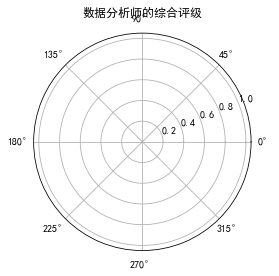

In [22]:
###绘制雷达图
import matplotlib.pyplot as plt
import numpy as np
#1 建立坐标系
plt.subplot(111,polar=True)

#2 把整个圆分成5份
datalength=5

#3 在指定的间隔内返回均匀间隔的数字
angles = np.linspace(0,2*np.pi,datalength,endpoint=False)
labels = ['沟通能力','业务理解能力','逻辑思维能力','快速学习能力','工具使用能力']
data = [2,3.5,4,4.5,5]
data = np.concatenate((data,[data[0]]))
angles = np.concatenate((angles,[angles[0]]))

#4 绘图
plt.polar(angles=angles,labels=labels)
plt.title('数据分析师的综合评级',loc='center')

Text(0.5, 1.0, 'xxx公司1-9月份注册与激活人数')

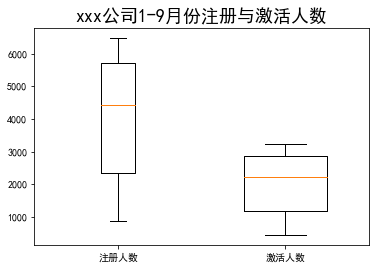

In [19]:
###绘制箱型图
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.subplot(1,1,1)
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([433,1167,2855,3241,3060,802,1906,2214,2315])
x = [y1,y2]
labels = ['注册人数','激活人数']
plt.boxplot(x,labels=labels,vert=True,widths=[0.2,0.5])
plt.title('xxx公司1-9月份注册与激活人数',loc='center',fontsize=18)

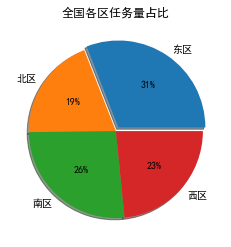

In [23]:
###绘制饼图
plt.subplot(1,1,1)
x = np.array([8566,5335,7310,6482])
labels = ['东区','北区','南区','西区']
explode = [0.05,0,0,0]
labeldistance = 1.1
plt.pie(x,labels=labels,autopct='%.0f%%',shadow=True,explode=explode,radius=1.0,labeldistance=labeldistance)
plt.title('全国各区任务量占比',loc='center')
plt.savefig('饼图示例.jpg')

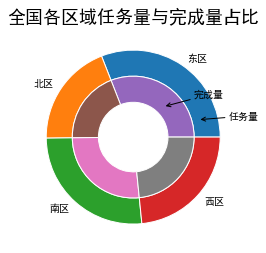

In [15]:
###绘制环形图
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.subplot(1,1,1)
x1 = np.array([8566,5335,7310,6482])
x2 = np.array([4283,2667,3655,3241])
labels = ['东区','北区','南区','西区']
plt.pie(x1,labels=labels,radius=1.0,wedgeprops=dict(width=0.3,edgecolor='w'))
plt.pie(x2,radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'))
plt.annotate('完成量',xy=(0.35,0.35),xytext=(0.7,0.45),arrowprops=dict(facecolor='black',arrowstyle='->'))
plt.annotate('任务量',xy=(0.75,0.20),xytext=(1.1,0.2),arrowprops=dict(facecolor='black',arrowstyle='->'))
plt.title('全国各区域任务量与完成量占比',loc='center',fontsize=18)
plt.savefig('环形图示例.jpg')

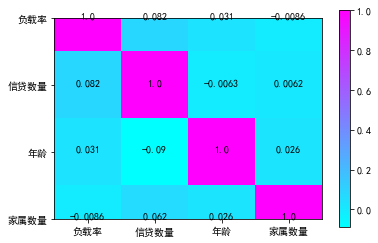

In [21]:
###绘制热力图

import itertools
#1 几个相关指标之间的相关性
x = np.array([
    [1,0.082,0.031,-0.0086],
    [0.082,1,-0.0063,0.0062],
    [0.031,-0.09,1,0.026],
    [-0.0086,0.062,0.026,1]
])

#2 设置配色方案
cmap = plt.cm.cool
plt.imshow(x,cmap=cmap)

#3 显示右边的颜色条
plt.colorbar()

#4 设置x轴和y轴的刻度标签
classes = ['负载率','信贷数量','年龄','家属数量']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes)

#5 将数值显示在指定位置
for i,j in itertools.product(range(x.shape[0]),range(x.shape[1])):
    #plt.text(j,i,x[i,j],horizontalalignment='center')
    plt.text(j,i,x[i,j],ha='center')

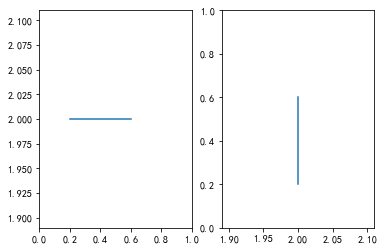

In [23]:
###画水平线和垂直线
plt.subplot(1,2,1)
plt.axhline(y=2,xmin=0.2,xmax=0.6)
plt.subplot(1,2,2)
plt.axvline(x=2,ymin=0.2,ymax=0.6)

### 13.9 绘制组合图表
组合图表就是在同一坐标系中绘制多张图表，常见的有折线图+折线图、折线图+柱形图、柱形图+柱形图（其实就是簇状柱形图）几种形式。
#### 13.9.1 折线图+折线图
建立坐标系后直接运行多行绘制折线图代码即可
#### 13.9.2 折线图+柱形图
同折线图+折线图一样，先运行折线图代码，然后再运行柱形图代码即可

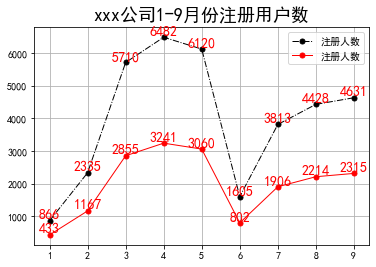

In [27]:
###绘制折线图+折线图实例
import numpy as np
import matplotlib.pyplot as plt 

#绘图的数据
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])

#解决中文乱码问题
plt.rcParams['font.sans-serif']='SimHei'

#1)建立一个坐标系
plt.subplot(1,1,1)

#2）指明x和y值
x = np.array([1,2,3,4,5,6,7,8,9])
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([433,1167,2855,3241,3060,802,1906,2214,2315])

#3）绘图
plt.plot(
    x,y1,
    color='k',
    linestyle='dashdot',
    linewidth=1,
    marker='o',
    markersize=5,
    label='注册人数'
)
plt.plot(
    x,y2,
    color='r',
    linestyle='solid',
    linewidth=1,
    marker='o',
    markersize=5,
    label='注册人数'
)

#4）设置标题(标题名及标题位置)
plt.title('xxx公司1-9月份注册用户数',loc='center',fontsize=18)

#5）添加数据标签
for a,b in zip(x,y1):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=14,color='red')
for a,b in zip(x,y2):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=14,color='red')
    
#6）设置网格线
plt.grid(True)

#7）设置图例
plt.legend()

#8）保存图到本地
plt.savefig('折线图+折线图示例.jpg')

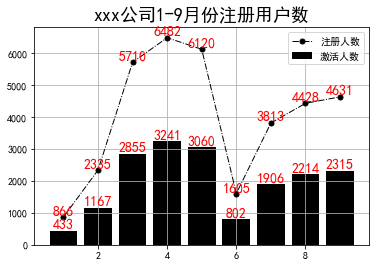

In [28]:
###绘制折线图+柱形图
plt.subplot(1,1,1)
x = np.array([1,2,3,4,5,6,7,8,9])
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([433,1167,2855,3241,3060,802,1906,2214,2315])

#3）绘图
plt.plot(
    x,y1,
    color='k',
    linestyle='dashdot',
    linewidth=1,
    marker='o',
    markersize=5,
    label='注册人数'
)
plt.bar(x,y2,color='k',label='激活人数')
#4）设置标题(标题名及标题位置)
plt.title('xxx公司1-9月份注册用户数',loc='center',fontsize=18)

#5）添加数据标签
for a,b in zip(x,y1):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=14,color='red')
for a,b in zip(x,y2):
    plt.text(a,b,b,ha='center',va='bottom',fontsize=14,color='red')
    
#6）设置网格线
plt.grid(True)

#7）设置图例
plt.legend()

#8）保存图到本地
plt.savefig('折线图+柱形图示例.jpg')

In [ ]:
### 13.10 绘制双坐标轴图表
双坐标轴图表是既有主坐标轴又有次坐标轴的图表，当两个不同量级的指标放在同一坐标系时，就需要开启双坐标轴。
#### 13.10.1 绘制双y轴图表
双y轴图表就是一个坐标系有两条y轴，使用的是plt库的twinx方法。具体绘制流程为：
○ 建立坐标系
○ 绘制主坐标轴上的图表
○ 调用twinx方法绘制次坐标轴上的图表
#### 13.10.2 绘制双x轴图表
双x轴图表的一个坐标系有两条x轴  

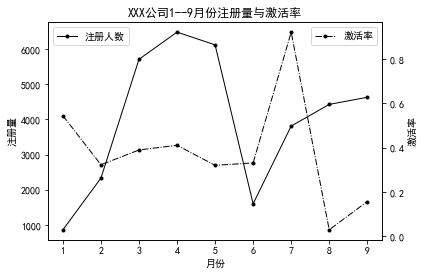

In [35]:
plt.subplot(1,1,1)
x = np.array([1,2,3,4,5,6,7,8,9])
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([0.54459448,0.32322354,0.39002751,0.41121879,0.32063077,0.33152276,0.92226226,0.02950071,0.15716906])
plt.plot(x,y1,color='k',linestyle='solid',linewidth=1,marker='o',markersize=3,label='注册人数')
plt.xlabel('月份')
plt.ylabel('注册量')
plt.legend(loc='upper left')
plt.twinx()
plt.plot(x,y2,color='k',linestyle='dashdot',linewidth=1,marker='o',markersize=3,label='激活率')
plt.xlabel('月份')
plt.ylabel('激活率')
plt.legend()
plt.title('XXX公司1--9月份注册量与激活率',loc='center')
plt.savefig('双坐标轴图表示例.jpg')

### 13.11 绘图样式设置
Matplotlib库默认的样式看起来都不那么好看，但是matplotlib库支持你调用其他样式，让你有更大选择。使用plt.style.available即可查看matplotlib库支持的所有样式。
如果要使用其中某种样式，只要在程序开头加上下面这行代码即可
plt.style.use('样式名')
需要注意的是，一旦在一段程序的开头指明了使用哪种样式，那么改程序接下来所有图标都会使用这种样式。